## This is a Final Assignment for the Week 3 (Module 10) : "Capstone Project" 

## The objective of this assignment will be "Segmenting and Clustering Neighborhoods in Toronto"  

## 1.The first part of this assignment will be getting information from Wikipedia about the neighborhoods and postal codes in Toronto. We'll be using Beautiful Soup. 

In [73]:
#!pip install requests
!pip install bs4

#Import the required modules and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd

#Import the required modules and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

html="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" 
data  = requests.get(html).text 
soup = BeautifulSoup(data, 'html5lib')


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [30]:
tag_object=soup.title
print("tag object:",tag_object)
print("tag object type:",type(tag_object))

tag_object=soup.h3
print(tag_object)



tag object: <title>List of postal codes of Canada: M - Wikipedia</title>
tag object type: <class 'bs4.element.Tag'>
<h3 class="vector-menu-heading" id="p-personal-label">
		<span>Personal tools</span>
	</h3>


In [31]:
html="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" 
data  = requests.get(html)
soup = BeautifulSoup(data.content, 'lxml')
data = soup.find_all('table')[0]
df= pd.read_html(str(data)) 

neighborhood=pd.DataFrame(df[0]) 
neighborhood

0  \
0                                     M1ANot assigned   
1                     M1BScarborough(Malvern / Rouge)   
2   M1CScarborough(Rouge Hill / Port Union / Highl...   
3   M1EScarborough(Guildwood / Morningside / West ...   
4                              M1GScarborough(Woburn)   
5                           M1HScarborough(Cedarbrae)   
6                 M1JScarborough(Scarborough Village)   
7   M1KScarborough(Kennedy Park / Ionview / East B...   
8   M1LScarborough(Golden Mile / Clairlea / Oakridge)   
9   M1MScarborough(Cliffside / Cliffcrest / Scarbo...   
10       M1NScarborough(Birch Cliff / Cliffside West)   
11  M1PScarborough(Dorset Park / Wexford Heights /...   
12                 M1RScarborough(Wexford / Maryvale)   
13                          M1SScarborough(Agincourt)   
14  M1TScarborough(Clarks Corners / Tam O'Shanter ...   
15  M1VScarborough(Milliken / Agincourt North / St...   
16     M1WScarborough(Steeles West / L'Amoreaux West)   
17                        M1XScarborough(Upper Rouge)   
18                                    M1YNot assigned   
19                                    M1ZNot assigned   

                                                1  \
0                                 M2ANot assigned   
1                                 M2BNot assigned   
2                                 M2CNot assigned   
3                                 M2ENot assigned   
4                                 M2GNot assigned   
5                M2HNorth York(Hillcrest Village)   
6   M2JNorth York(Fairview / Henry Farm / Oriole)   
7                  M2KNorth York(Bayview Village)   
8        M2LNorth York(York Mills / Silver Hills)   
9         M2MNorth York(Willowdale / Newtonbrook)   
10                 M2NNorth York(Willowdale)South   
11                 M2PNorth York(York Mills West)   
12                  M2RNorth York(Willowdale)West   
13                                M2SNot assigned   
14                                M2TNot assigned   
15                                M2VNot assigned   
16                                M2WNot assigned   
17                                M2XNot assigned   
18                                M2YNot assigned   
19                                M2ZNot assigned   

                                                    2  \
0                            M3ANorth York(Parkwoods)   
1                       M3BNorth York(Don Mills)North   
2      M3CNorth York(Don Mills)South(Flemingdon Park)   
3                                     M3ENot assigned   
4                                     M3GNot assigned   
5   M3HNorth York(Bathurst Manor / Wilson Heights ...   
6     M3JNorth York(Northwood Park / York University)   
7          M3KNorth York(Downsview)East (CFB Toronto)   
8                        M3LNorth York(Downsview)West   
9                     M3MNorth York(Downsview)Central   
10                  M3NNorth York(Downsview)Northwest   
11                                    M3PNot assigned   
12                                    M3RNot assigned   
13                                    M3SNot assigned   
14                                    M3TNot assigned   
15                                    M3VNot assigned   
16                                    M3WNot assigned   
17                                    M3XNot assigned   
18                                    M3YNot assigned   
19                                    M3ZNot assigned   

                                                    3  \
0                     M4ANorth York(Victoria Village)   
1      M4BEast York(Parkview Hill / Woodbine Gardens)   
2                      M4CEast York(Woodbine Heights)   
3                        M4EEast Toronto(The Beaches)   
4                               M4GEast York(Leaside)   
5                      M4HEast York(Thorncliffe Park)   
6         M4JEast YorkEast Toronto(The Danforth East)   
7      M4KEast Toronto(The Danforth West / Riverdale)   
8    M4LEast Toronto(India Ba

In [32]:
print(neighborhood.shape)

(20, 9)


## We will try to reduce the dataframe to 3 columns 


In [33]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass  
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()


PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

## There are 103 rows and 3 columns in the new dataframe 

In [34]:
print(df.shape)

(103, 3)


In [35]:
df = df.dropna()
empty = 'Not assigned\n'
df = df[(df.PostalCode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]


## 2. For the Second Part of the assignment, we need to find the geocordinates of the postal codes of Toronto. We'll be using 2 methods : using geocoder and using a csv document 

In [36]:
!pip install geocoder
import geocoder


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [37]:
g = geocoder.google('Toronto, Ontario')
g.latlng

## Getting the coordinates of postal codes using geocoder

In [38]:
postal_code = df['PostalCode']

# Using while Statement
latitude = []
longitude = []
n = 0

while n < len(postal_code):
    g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code[n]))
    lat_lng_coords = g.latlng
    print('Latitude and Longtitude of {} : {}, {}.'.format(postal_code[n], lat_lng_coords[0], lat_lng_coords[1]))
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    n = n + 1

df['Latitude'] = latitude
df['Longitude'] = longitude

df.head()

Latitude and Longtitude of M3A : 43.75245000000007, -79.32990999999998.
Latitude and Longtitude of M4A : 43.73057000000006, -79.31305999999995.
Latitude and Longtitude of M5A : 43.65512000000007, -79.36263999999994.
Latitude and Longtitude of M6A : 43.72327000000007, -79.45041999999995.
Latitude and Longtitude of M7A : 43.66253000000006, -79.39187999999996.
Latitude and Longtitude of M9A : 43.662630000000036, -79.52830999999998.
Latitude and Longtitude of M1B : 43.811390000000074, -79.19661999999994.
Latitude and Longtitude of M3B : 43.74923000000007, -79.36185999999998.
Latitude and Longtitude of M4B : 43.70718000000005, -79.31191999999999.
Latitude and Longtitude of M5B : 43.65739000000008, -79.37803999999994.
Latitude and Longtitude of M6B : 43.70687000000004, -79.44811999999996.
Latitude and Longtitude of M9B : 43.65034000000003, -79.55361999999997.
Latitude and Longtitude of M1C : 43.78574000000003, -79.15874999999994.
Latitude and Longtitude of M3C : 43.72168000000005, -79.343519

PostalCode           Borough                      Neighborhood  Latitude  \
0        M3A        North York                         Parkwoods  43.75245   
1        M4A        North York                  Victoria Village  43.73057   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.65512   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.72327   
4        M7A      Queen's Park     Ontario Provincial Government  43.66253   

   Longitude  
0  -79.32991  
1  -79.31306  
2  -79.36264  
3  -79.45042  
4  -79.39188

In [39]:
# Use geopy library to get the latitude and longitude values of Toronto.
#in order to define an instance of the geocoder, we need to define a user_agent. We will name our agent toronto_explorer, as shown below.
from geopy.geocoders import Nominatim # converts an address into latitude and longitude values
address = 'Toronto, Ontario'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario are: {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto, Ontario are: 43.6534817, -79.3839347.


In [72]:
print(df.shape)


(103, 5)


## Getting the coordinates of postal codes via the read_csv function

In [41]:
geo='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
geo=pd.read_csv(geo)
print(geo.shape)
geo.head()


(103, 3)


Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [42]:
# merge data frames
merged = pd.concat([df], axis=1)
merged.head()


PostalCode           Borough                      Neighborhood  Latitude  \
0        M3A        North York                         Parkwoods  43.75245   
1        M4A        North York                  Victoria Village  43.73057   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.65512   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.72327   
4        M7A      Queen's Park     Ontario Provincial Government  43.66253   

   Longitude  
0  -79.32991  
1  -79.31306  
2  -79.36264  
3  -79.45042  
4  -79.39188

## 3. For the Third Part of the assignment, we need to analyse the dataset to explore and cluster the neighborhoods in the city of Toronto. We'll be using K-Means, Foursquare and visualization maps. 

In [43]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import json
import requests

print('Libraries imported.')

Libraries imported.


In [44]:
 ! pip install folium==0.5.0  


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [45]:
import folium # map rendering library

In [46]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if folium is not running 


In [47]:
map_ = folium.Map(location=[latitude, longitude], zoom_start=10)


for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    
       
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_)  
    
map_ #a map might not be displayed in a github. to visualize a map, copy a github link and paste it on https://nbviewer.jupyter.org/

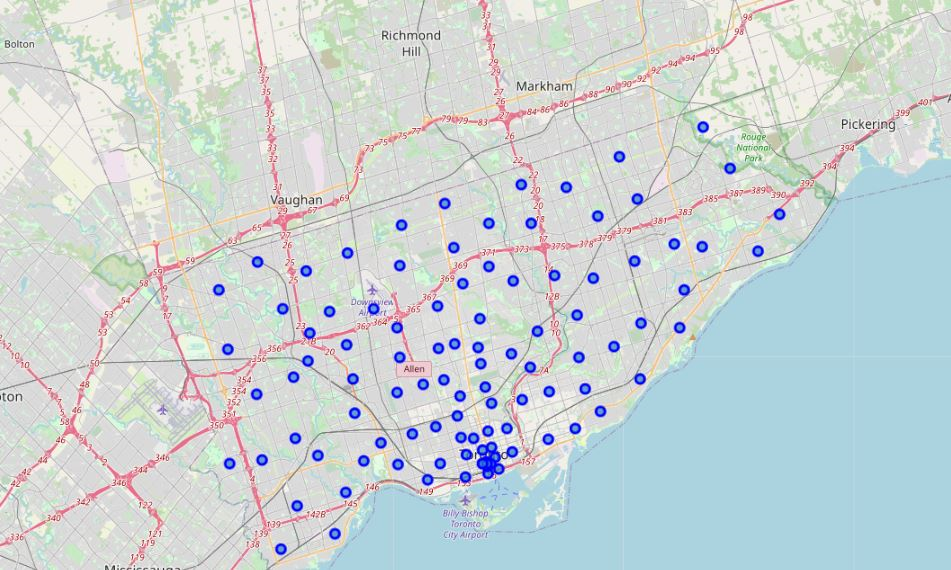

In [48]:
# @hiddel_cell
CLIENT_ID = '3NP4QGIZK5BNPSRUUQ4LAKIHPMC40YB14VOZZOORMYCQELSF' # my Foursquare ID
CLIENT_SECRET = 'HDW0QZN5BNSTGTKIDRNQKKZDPDSIE4ITIIFXX2XQ52XDPPLQ' # my Foursquare Secret
VERSION = '20180605'
LIMIT = 30
print('My credentials:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

My credentails:
CLIENT_ID: 3NP4QGIZK5BNPSRUUQ4LAKIHPMC40YB14VOZZOORMYCQELSF
CLIENT_SECRET: HDW0QZN5BNSTGTKIDRNQKKZDPDSIE4ITIIFXX2XQ52XDPPLQ


In [49]:
#Getting and exploring the first neighborhood in the dataframe.
df.loc[0, 'Neighborhood']


'Parkwoods'

In [50]:
#Getting the neighborhood's latitude and longitude values.
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, neighborhood_latitude,neighborhood_longitude))


Latitude and longitude values of Parkwoods are 43.75245000000007, -79.32990999999998.


In [51]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=3NP4QGIZK5BNPSRUUQ4LAKIHPMC40YB14VOZZOORMYCQELSF&client_secret=HDW0QZN5BNSTGTKIDRNQKKZDPDSIE4ITIIFXX2XQ52XDPPLQ&v=20180605&ll=43.75245000000007,-79.32990999999998&radius=500&limit=100'

In [52]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60bd1fef795c990530e57165'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.75695000450007,
    'lng': -79.32369182386579},
   'sw': {'lat': 43.747949995500065, 'lng': -79.33612817613418}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLng

In [53]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [54]:
#cleaning the json and structuring it into a pandas dataframe.

venues = results['response']['groups'][0]['items'] 
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()




name            categories        lat        lng
0  Brookbanks Park                  Park  43.751976 -79.332140
1              KFC  Fast Food Restaurant  43.754387 -79.333021
2    Variety Store     Food & Drink Shop  43.751974 -79.333114

In [55]:
#And how many venues were returned by Foursquare?
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


3 venues were returned by Foursquare.


In [56]:
#creating a function that repeats the same process to all neighborhoods in Toronto 
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [57]:
#writing the code to run the above function on each neighborhood and create a new dataframe called toronto_venues.
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
toronto_venues

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

Neighborhood  \
0                                             Parkwoods   
1                                             Parkwoods   
2                                             Parkwoods   
3                                      Victoria Village   
4                                      Victoria Village   
5                                      Victoria Village   
6                                      Victoria Village   
7                             Regent Park, Harbourfront   
8                             Regent Park, Harbourfront   
9                             Regent Park, Harbourfront   
10                            Regent Park, Harbourfront   
11                            Regent Park, Harbourfront   
12                            Regent Park, Harbourfront   
13                            Regent Park, Harbourfront   
14                            Regent Park, Harbourfront   
15                            Regent Park, Harbourfront   
16                            Regent Park, Harbourfront   
17                            Regent Park, Harbourfront   
18                            Regent Park, Harbourfront   
19                            Regent Park, Harbourfront   
20                            Regent Park, Harbourfront   
21                            Regent Park, Harbourfront   
22                            Regent Park, Harbourfront   
23                            Regent Park, Harbourfront   
24                            Regent Park, Harbourfront   
25                            Regent Park, Harbourfront   
26                            Regent Park, Harbourfront   
27                     Lawrence Manor, Lawrence Heights   
28                     Lawrence Manor, Lawrence Heights   
29                     Lawrence Manor, Lawrence Heights   
30                     Lawrence Manor, Lawrence Heights   
31                     Lawrence Manor, Lawrence Heights   
32                     Lawrence Manor, Lawrence Heights   
33                     Lawrence Manor, Lawrence Heights   
34                     Lawrence Manor, Lawrence Heights   
35                     Lawrence Manor, Lawrence Heights   
36                     Lawrence Manor, Lawrence Heights   
37                     Lawrence Manor, Lawrence Heights   
38                     Lawrence Manor, Lawrence Heights   
39                     Lawrence Manor, Lawrence Heights   
40                     Lawrence Manor, Lawrence Heights   
41                     Lawrence Manor, Lawrence Heights   
42                     Lawrence Manor, Lawrence Heights   
43                     Lawrence Manor, Lawrence Heights   
44                     Lawrence Manor, Lawrence Heights   
45                     Lawrence Manor, Lawrence Heights   
46                     Lawrence Manor, Lawrence Heights   
47                     Lawrence Manor, Lawrence Heights   
48                     Lawrence Manor, Lawrence Heights   
49                     Lawrence Manor, Lawrence Heights   
50                     Lawrence Manor, Lawrence Heights   
51                     Lawrence Manor, Lawrence Heights   
52                     Lawrence Manor, Lawrence Heights   
53                     Lawrence Manor, Lawrence Heights   
54                     Lawrence Manor, Lawrence Heights   
55                     Lawrence Manor, Lawrence Heights   
56                     Lawrence Manor, Lawrence Heights   
57                     Lawrence Manor, Lawrence Heights   
58                     Lawrence Manor, Lawrence Heights   
59                     Lawrence Manor, Lawrence Heights   
60                     Lawrence Manor, Lawrence Heights   
61                     Lawrence Manor, Lawrence Heights   
62                     Lawrence Manor, Lawrence Heights   
63                     Lawrence Manor, Lawrence Heights   
64                     Lawrence Manor, Lawrence Heights   
65                     Lawrence Manor, Lawrence Heights   
66                     Lawrence Manor, Lawrence Heights   
67                     Lawrence

In [58]:
#Let's check the size of the resulting dataframe
print(toronto_venues.shape)
toronto_venues.head()


(2239, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods               43.75245               -79.32991   
1         Parkwoods               43.75245               -79.32991   
2         Parkwoods               43.75245               -79.32991   
3  Victoria Village               43.73057               -79.31306   
4  Victoria Village               43.73057               -79.31306   

                Venue  Venue Latitude  Venue Longitude        Venue Category  
0     Brookbanks Park       43.751976       -79.332140                  Park  
1                 KFC       43.754387       -79.333021  Fast Food Restaurant  
2       Variety Store       43.751974       -79.333114     Food & Drink Shop  
3        Wigmore Park       43.731023       -79.310771                  Park  
4  Memories of Africa       43.726602       -79.312427         Grocery Store

In [59]:
#Let's check how many venues were returned for each neighborhood
toronto_venues.groupby('Neighborhood').count()


Neighborhood Latitude  \
Neighborhood                                                                
Agincourt                                                              14   
Alderwood, Long Branch                                                  4   
Bathurst Manor, Wilson Heights, Downsview North                         2   
Bayview Village                                                         4   
Bedford Park, Lawrence Manor East                                      21   
Berczy Park                                                            50   
Birch Cliff, Cliffside West                                             4   
Brockton, Parkdale Village, Exhibition Place                           80   
CN Tower, King and Spadina, Railway Lands, Harb...                     75   
Caledonia-Fairbanks                                                     7   
Cedarbrae                                                               2   
Central Bay Street                                                     53   
Christie                                                                9   
Church and Wellesley                                                   68   
Clairville, Humberwood, Woodbine Downs, West Hu...                      7   
Clarks Corners, Tam O'Shanter, Sullivan                                14   
Cliffside, Cliffcrest, Scarborough Village West                        10   
Commerce Court, Victoria Hotel                                        100   
Davisville                                                             21   
Davisville North                                                        8   
Del Ray, Mount Dennis, Keelsdale and Silverthorn                        6   
Don Mills North                                                         4   
Don Mills South                                                         7   
Dorset Park, Wexford Heights, Scarborough Town ...                      2   
Downsview East                                                         10   
Downsview Northwest                                                    17   
Downsview West                                                         11   
Dufferin, Dovercourt Village                                           18   
Enclave of L4W                                                         94   
Enclave of M4L                                                         94   
Enclave of M5E                                                         94   
Eringate, Bloordale Gardens, Old Burnhamthorpe,...                      7   
Fairview, Henry Farm, Oriole                                           47   
First Canadian Place, Underground city                                100   
Forest Hill North & West                                                2   
Garden District, Ryerson                                              100   
Glencairn                                                               7   
Golden Mile, Clairlea, Oakridge                                         9   
Guildwood, Morningside, West Hill                                       4   
Harbourfront East, Union Station, Toronto Islands                      54   
High Park, The Junction South                                           1   
Hillcrest Village                                                       3   
Humber Summit                                                           4   
Humberlea, Emery                                                        4   
Humewood-Cedarvale                                                      6   
India Bazaar, The Beaches West                                         18   
Islington Avenue                                                        8   
Kennedy Park, Ionview, East Birchmount Park                             4   
Kensington Market, Chinatown, Grange Park                              46   
Kingsview Village, St. Phillips, Martin Grove G...                      2   
Lawrence Manor, Lawrence Heights                

In [60]:
#Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

#Analyzing Each Neighborhood
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()


There are 256 uniques categories.
(2239, 256)


Yoga Studio  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0    0                  0               0                  0   
1            0    0                  0               0                  0   
2            0    0                  0               0                  0   
3            0    0                  0               0                  0   
4            0    0                  0               0                  0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                    0             0         0            0   
1                    0             0         0            0   
2                    0             0         0            0   
3                    0             0         0            0   
4                    0             0         0            0   

   Arts & Crafts Store  Asian Restaurant  Astrologer  Athletics & Sports  \
0                    0                 0           0                   0   
1                    0                 0           0                   0   
2                    0                 0           0                   0   
3                    0                 0           0                   0   
4                    0                 0           0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Badminton Court  \
0                0            0          0           0                0   
1                0            0          0           0                0   
2                0            0          0           0                0   
3                0            0          0           0                0   
4                0            0          0           0                0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Basketball Court  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Stadium  Beer Bar  Beer Store  Belgian Restaurant  Bike Trail  \
0                   0         0           0                   0           0   
1                   0         0           0                   0           0   
2                   0         0           0                   0           0   
3                   0         0           0                   0           0   
4                   0         0           0                   0           0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridge  Bubble Tea Shop  Burger Joint  \
0               0        0       0                0             0   
1               0        0       0                0             0   
2               0        0       0                0             0   
3               0        0       0                0             0   
4               0        0       0                0             0   

   Burrito Place  Bus Line  Bus Station  Bus Stop  Business Service  Butcher  \
0              0         0            0         0                 0        0   
1              0         0            0         0                 0        0   
2              0         0            0         0                 0        0   
3              0         0            0         0                 0        0   
4              0         0            0         0                 0        0   

   Café  Camera Store  Candy Store

In [61]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(toronto_grouped.shape)
toronto_grouped


(101, 256)


Neighborhood  Yoga Studio       ATM  \
0                                            Agincourt     0.000000  0.000000   
1                               Alderwood, Long Branch     0.000000  0.000000   
2      Bathurst Manor, Wilson Heights, Downsview North     0.000000  0.000000   
3                                      Bayview Village     0.000000  0.000000   
4                    Bedford Park, Lawrence Manor East     0.000000  0.000000   
5                                          Berczy Park     0.000000  0.000000   
6                          Birch Cliff, Cliffside West     0.000000  0.000000   
7         Brockton, Parkdale Village, Exhibition Place     0.012500  0.000000   
8    CN Tower, King and Spadina, Railway Lands, Har...     0.013333  0.000000   
9                                  Caledonia-Fairbanks     0.000000  0.000000   
10                                           Cedarbrae     0.000000  0.000000   
11                                  Central Bay Street     0.000000  0.000000   
12                                            Christie     0.000000  0.000000   
13                                Church and Wellesley     0.000000  0.000000   
14   Clairville, Humberwood, Woodbine Downs, West H...     0.000000  0.000000   
15             Clarks Corners, Tam O'Shanter, Sullivan     0.000000  0.000000   
16     Cliffside, Cliffcrest, Scarborough Village West     0.000000  0.000000   
17                      Commerce Court, Victoria Hotel     0.000000  0.000000   
18                                          Davisville     0.000000  0.000000   
19                                    Davisville North     0.000000  0.000000   
20    Del Ray, Mount Dennis, Keelsdale and Silverthorn     0.000000  0.166667   
21                                     Don Mills North     0.000000  0.000000   
22                                     Don Mills South     0.000000  0.000000   
23   Dorset Park, Wexford Heights, Scarborough Town...     0.000000  0.000000   
24                                      Downsview East     0.000000  0.000000   
25                                 Downsview Northwest     0.000000  0.000000   
26                                      Downsview West     0.000000  0.000000   
27                        Dufferin, Dovercourt Village     0.000000  0.000000   
28                                      Enclave of L4W     0.000000  0.000000   
29                                      Enclave of M4L     0.000000  0.000000   
30                                      Enclave of M5E     0.000000  0.000000   
31   Eringate, Bloordale Gardens, Old Burnhamthorpe...     0.000000  0.000000   
32                        Fairview, Henry Farm, Oriole     0.000000  0.000000   
33              First Canadian Place, Underground city     0.000000  0.000000   
34                            Forest Hill North & West     0.000000  0.000000   
35                            Garden District, Ryerson     0.000000  0.000000   
36                                           Glencairn     0.000000  0.000000   
37                     Golden Mile, Clairlea, Oakridge     0.000000  0.000000   
38                   Guildwood, Morningside, West Hill     0.000000  0.000000   
39   Harbourfront East, Union Station, Toronto Islands     0.000000  0.000000   
40                       High Park, The Junction South     0.000000  0.000000   
41                                   Hillcrest Village     0.000000  0.000000   
42                                       Humber Summit     0.000000  0.000000   
43                                    Humberlea, Emery     0.000000  0.000000   
44                                  Humewood-Cedarvale     0.000000  0.000000   
45                      India Bazaar, The Beaches West     0.000000  0.000000   
46                                    Islington Avenue     0.000000  0.000000   
47         Kennedy Park, Ionview, East Birchmount Park     0.000000  0.000000   
48           Kensington Market, Chinatown, Grange Park     0.000000  0.00

In [62]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Agincourt----
                 venue  freq
0   Chinese Restaurant  0.14
1               Bakery  0.07
2  Shanghai Restaurant  0.07
3          Supermarket  0.07
4            Newsagent  0.07


----Alderwood, Long Branch----
                     venue  freq
0        Convenience Store  0.25
1  Health & Beauty Service  0.25
2    Performing Arts Venue  0.25
3                      Pub  0.25
4              Yoga Studio  0.00


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0               Home Service   0.5
1           Business Service   0.5
2              Metro Station   0.0
3  Middle Eastern Restaurant   0.0
4         Miscellaneous Shop   0.0


----Bayview Village----
                             venue  freq
0                            Trail  0.50
1                             Park  0.25
2       Construction & Landscaping  0.25
3  Molecular Gastronomy Restaurant  0.00
4                           Museum  0.00


----Bedford Park, Lawrence Manor Ea

In [63]:
#Let's put that into a pandas dataframe. First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] =toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


Neighborhood 1st Most Common Venue  \
0                                        Agincourt    Chinese Restaurant   
1                           Alderwood, Long Branch                   Pub   
2  Bathurst Manor, Wilson Heights, Downsview North          Home Service   
3                                  Bayview Village                 Trail   
4                Bedford Park, Lawrence Manor East        Sandwich Place   

        2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
0            Sushi Restaurant          Grocery Store        Discount Store   
1     Health & Beauty Service  Performing Arts Venue     Convenience Store   
2            Business Service          Women's Store       Doctor's Office   
3  Construction & Landscaping                   Park         Women's Store   
4                 Coffee Shop               Pharmacy     Indian Restaurant   

  5th Most Common Venue  
0           Supermarket  
1         Women's Store  
2                 Field  
3  Ethiopian Restaurant  
4  Fast Food Restaurant

In [64]:
#Clustering neighborhoods. Run k-means to cluster the neighborhood into 5 clusters. set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_


array([0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 4, 4, 0, 0, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [65]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood. add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = merged.iloc[:16,:] 

# merge toronto_grouped with df to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!


PostalCode           Borough                      Neighborhood  Latitude  \
0        M3A        North York                         Parkwoods  43.75245   
1        M4A        North York                  Victoria Village  43.73057   
2        M5A  Downtown Toronto         Regent Park, Harbourfront  43.65512   
3        M6A        North York  Lawrence Manor, Lawrence Heights  43.72327   
4        M7A      Queen's Park     Ontario Provincial Government  43.66253   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0  -79.32991               2  Fast Food Restaurant     Food & Drink Shop   
1  -79.31306               2         Grocery Store              Pharmacy   
2  -79.36264               0           Coffee Shop       Thai Restaurant   
3  -79.45042               0        Clothing Store            Restaurant   
4  -79.39188               0           Coffee Shop         Burrito Place   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  
0                  Park           Women's Store   Distribution Center  
1     German Restaurant                    Park           Escape Room  
2           Event Space          Sandwich Place                   Spa  
3      Toy / Game Store  Furniture / Home Store  Fast Food Restaurant  
4    Persian Restaurant                 Theater          Burger Joint

In [66]:
#Finally, let's visualize the resulting clusters. create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
        
markers_colors = []
for lat, lon, label, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(label) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1], 
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters #a map might not be displayed in a github. to visualize a map, copy a github link and paste it on https://nbviewer.jupyter.org/


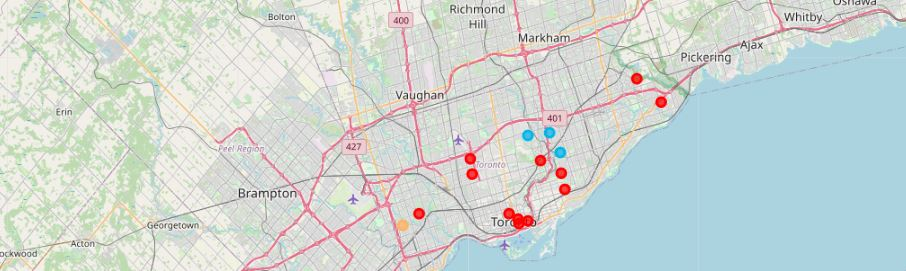

### The maps are not viewable in github. 
###  To view the maps, go to https://nbviewer.jupyter.org/ and enter the notebook github link and view it there. 


In [69]:
toronto_merged.shape

(16, 11)

##### This notebook is realized by Zhanna for the Coursera Project.  